In [1]:
import os
import sys
sys.path.append(os.path.abspath('../head_detect'))
sys.path.append(os.path.abspath('../code'))
sys.path.append(os.path.abspath('../tools'))

import numpy as np
from frameROI import FrameROI as  fr
from vgg_face import VGGface 
from face_detector1 import FaceDetector 
from facedetector_evaluation import videoDetectorEvaluation , Video2Frame

from predict import HeadDetector 
from shutil import copyfile,rmtree

from run_vgg import mtcnnFace
from hog_faceDetection import hog_face_detection
from dlib_faceDetection import dlib_face_detection

rawimg= '../data/test2.jpg'#videoframe/5695231002474224804_veg300_20.jpg'
saveto= '../data/model_evaluation2'

Using TensorFlow backend.


In [2]:
def haarcascade_frontalface(rawimg):
    tempdir='../Data/ttemp_imgdir'
    if not os.path.exists(tempdir):
        os.mkdir(tempdir)
        
    dst= os.path.join(tempdir, os.path.basename(rawimg))
    copyfile(rawimg, dst)
    #-----------
    x= mtcnnFace.extract_face(tempdir)
    #-----------
    os.remove(dst)
    return x
haarcascade_frontalface(rawimg)

array([[346, 139,  63,  63],
       [313,  91,  51,  51],
       [237, 183,  86,  86],
       [445, 152,  83,  83],
       [ 47,  56,  57,  57],
       [340, 279,  75,  75],
       [104,  44,  84,  84],
       [586, 261,  91,  91],
       [566, 173,  33,  33],
       [ 53, 178,  75,  75],
       [127, 177,  91,  91]], dtype=int32)

In [3]:
def hog_face(rawimg):
    tempdir='../Data/ttemp_imgdir'
    if not os.path.exists(tempdir):
        os.mkdir(tempdir)
        
    dst= os.path.join(tempdir, os.path.basename(rawimg))
    copyfile(rawimg, dst)
    #-----------
    x= hog_face_detection.hog_extract_face(tempdir)
    #-----------
    os.remove(dst)
    return x

hog_face(rawimg)

array([[455, 169, 520, 234],
       [584, 265, 677, 358],
       [349, 147, 403, 200],
       [134, 195, 211, 272],
       [315,  97, 360, 142],
       [340, 291, 405, 355],
       [ 48, 177, 125, 255],
       [247, 198, 312, 262],
       [ 52,  67,  96, 112],
       [111,  54, 176, 119],
       [570, 177, 596, 202]])

In [4]:
def dlib_face(rawimg):
    tempdir='../Data/ttemp_imgdir'
    if not os.path.exists(tempdir):
        os.mkdir(tempdir)
        
    dst= os.path.join(tempdir, os.path.basename(rawimg))
    copyfile(rawimg, dst)
    #-----------
    x= dlib_face_detection.dlib_extract_face(tempdir)
    #-----------
    os.remove(dst)
    return x

dlib_face(rawimg)

array([[583, 265, 673, 355],
       [453, 170, 515, 232],
       [354, 147, 406, 199],
       [ 55, 179, 129, 254],
       [342, 288, 405, 350],
       [126, 186, 215, 275],
       [319,  98, 362, 142],
       [114,  53, 176, 115],
       [ 55,  65,  98, 108],
       [245, 196, 320, 271]])

In [5]:

#model= VGGface.detect_roi_fromRawImg#, 
model= FaceDetector.detect_cv2dnn_fromRawImg_conf7 
#------------------------------------------------------------------------------

annotations = model(rawimg) # input rawimage, and return 2d numpy.array [[x,y,w,h]]
print(annotations)

# #create a relative labels for the annotation
labels= np.zeros(annotations.shape[0])
print(labels)

[[131 172  78  97]
 [457 147  62  93]
 [ 64 175  66  81]
 [356 136  48  64]
 [585 251  76 117]
 [244 179  64  86]
 [316  90  43  51]
 [114  55  57  63]
 [346 272  56  94]
 [ 52  57  46  53]
 [201 100  48  52]
 [568 171  27  35]
 [523 192  27  31]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [6]:


#------------------------------------------------------------------------------
# annotate face boundingbox and save
ROI=fr(rawimg, annotations=annotations, labels=labels , saveto_directory=saveto )
ROI.createROIs(crop=0, 
               save=1,
               boundingbox_color=(255,255,0))
#------------------------------------------------------------------------------
# #evaluation 
video='../data/5695231002474224804_veg301.wmv'
annotation_txt= '../data/5695231002474224804_veg301_gt.txt'

vd= Video2Frame(video, saveframe=0, savedir= '../data/model_evaluation2/eva')
vdE= videoDetectorEvaluation([VGGface.detect_roi_fromRawImg, 
                              FaceDetector.detect_cv2dnn_fromRawImg,
                              FaceDetector.detect_cv2dnn_fromRawImg_conf7,
                              FaceDetector.detect_cv2dnn_fromRawImg_conf3,
                              haarcascade_frontalface,
                              hog_face,
                              dlib_face
                              ], video,annotation_txt,
                             save= 1, savedir= vd.savedir)

print(vdE.eva)

13 rois have been annotated
model: 0 ..
     frame 0 ..
     frame 20 ..
     frame 40 ..
     frame 60 ..
cost time 36.59761643409729s
model: 1 ..
     frame 0 ..
     frame 20 ..
     frame 40 ..
     frame 60 ..
cost time 10.584611415863037s
model: 2 ..
     frame 0 ..
     frame 20 ..
     frame 40 ..
     frame 60 ..
cost time 10.656992197036743s
model: 3 ..
     frame 0 ..
     frame 20 ..
     frame 40 ..
     frame 60 ..
cost time 10.967999935150146s
model: 4 ..
     frame 0 ..
     frame 20 ..
     frame 40 ..
     frame 60 ..
cost time 7.165057897567749s
model: 5 ..
     frame 0 ..
     frame 20 ..
     frame 40 ..
     frame 60 ..
cost time 55.817216634750366s
model: 6 ..
     frame 0 ..
     frame 20 ..
     frame 40 ..
     frame 60 ..
cost time 30.497382402420044s
[(0, <function VGGface.detect_roi_fromRawImg at 0x000002944A69A620>, 36.59761643409729, 0.7015493781053777, 0.9388532664470891), (1, <function FaceDetector.detect_cv2dnn_fromRawImg at 0x00000294518B30D0>, 10.584

In [7]:
import pandas as pd

In [8]:
eva= pd.DataFrame(vdE.eva, columns=['idx', 'model','timecost', 'recall','precision'])

In [9]:

import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'

def bar_graph( ds, plotname='Time consumed per frame', colors='salmon'):
    my_colrs= colors
    if len(colors)==1 : my_colrs = colors* (len(ds))
    index = np.arange( len(ds))
    plt.bar(index, ds['timecost']/vdE.vf.frame_num ,width=1/2, color= my_colrs)
#     plt.bar(index, ds['recall'], color= 'green')
    plt.xlabel('models', fontsize=10)
    plt.ylabel('time/s/frame', fontsize=10)
    plt.xticks(index, ds['idx'].astype(int), fontsize=10, rotation=0,ha="right")
#     plt.ylim(0 , 0.3)#  
    plt.title(plotname+'\n')
    plt.show()

def bar_group(ds, plotname='Face detection model evaluation'):
    '''
    plot a grouped bar chart
    '''
    # set width of bar
    barWidth = 1/3   # if group of n, then the barWidth = 1/(n+1)

    # set height of bar
    bars1 = ds['recall']
    bars2 = ds['precision']

    # Set position of bar on X axis
    r1 = np.arange(len(ds))
    r2 = [x + barWidth for x in r1]

    # Make the plot
    plt.bar(r1, bars1, color='salmon', width=barWidth, edgecolor='white', label='recall')
    plt.bar(r2, bars2, color='lightseagreen', width=barWidth, edgecolor='white', label='precision')

    # Add xticks on the middle of the group bars
    plt.xlabel('model', fontsize=10)
    plt.ylabel('', fontsize=10)
    plt.xticks(ticks= [r + (0.5-barWidth) for r in range(len(bars1))], labels=ds['idx'],fontsize=10, rotation=0,ha="right")
    # Create legend & Show graphic
    plt.legend(bbox_to_anchor=(1, 1))
    plt.title(plotname+'\n')
    plt.show()

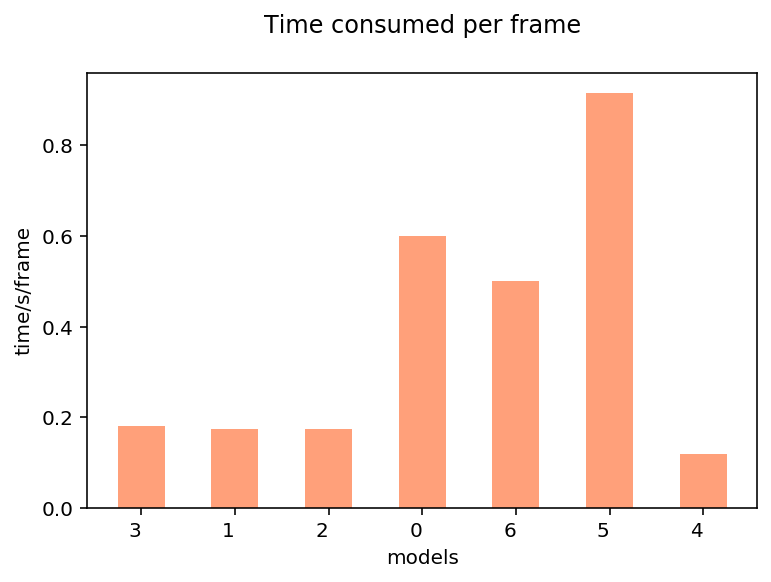

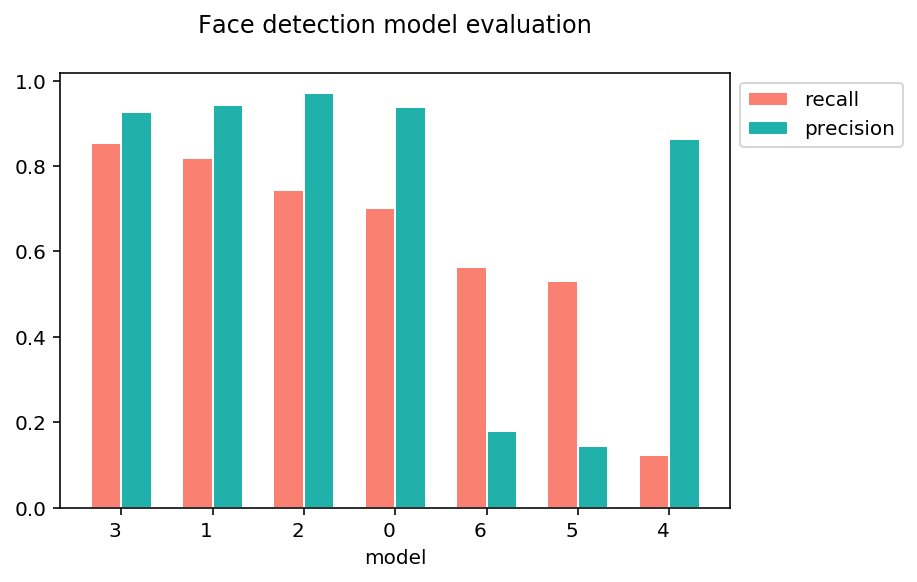

,idx,model,timecost,recall,precision
3,3,<function FaceDetector.detect_cv2dnn_fromRawIm...,10.968000,0.853408,0.926410
1,1,<function FaceDetector.detect_cv2dnn_fromRawIm...,10.584611,0.818057,0.942491
2,2,<function FaceDetector.detect_cv2dnn_fromRawIm...,10.656992,0.743285,0.970248
0,0,<function VGGface.detect_roi_fromRawImg at 0x0...,36.597616,0.701549,0.938853
6,6,<function dlib_face at 0x00000294531C2620>,30.497382,0.564159,0.178623
5,5,<function hog_face at 0x00000294531C27B8>,55.817217,0.530288,0.144274
4,4,<function haarcascade_frontalface at 0x0000029...,7.165058,0.123556,0.864067


In [10]:


ds= eva.sort_values(['recall', 'precision'], ascending=[False, True])
bar_graph(ds, colors= ['lightsalmon'])
bar_group(ds) 
ds

### Evaluation:

Before we start, a bit explanation about the recall and precision metrics. We all familiar with those two in the classification model evaluation. Likewise, we use 
- __recall__ to represent the rate that how many ground truth(manual annotation) head/faces are detected, 
- __precision__ to indicate how accurate that detected faces/heads are mannual annotated (=how much area of the detected faces/heads are included in the groundtruth bondingbox).

As shown in the above charts,

- There are two models dlib and hog respectively which have been evaluated with other models. As you can see, they do not have good performance and they consume more time when process each frame. Even though they have higher recall than haarcascade model, they have worse precison.
- Regarding the time cost, there is a trade off between recall and precision: the better the recall, the worse the precision. 

However, I think the recall should be preoritised given our ground truth are correct (99%+), because __when it is a false detected face, it wouldnot have a label, or definitely "non-active". it also would not affect too much to our model training. On the contrary, if we miss a acctually active speaker, then it can make a big difference to the training__. So, given the precision is considerable level( maybe >=90%), choose the highest recall model. 

As a conclusion, amongst the models, the best model is model3. 



